In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
# Import the dataset - Diabetes.csv
df = pd.read_csv(r'diabetes.csv')


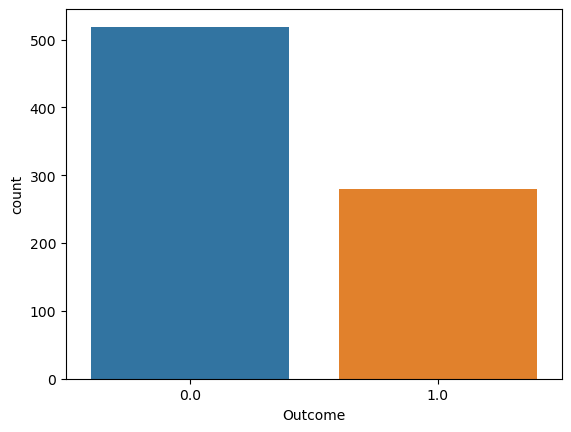

In [3]:
# Perform exploratory data analysis with respect to the Outcome variable
sns.countplot(x='Outcome', data=df)
plt.show()


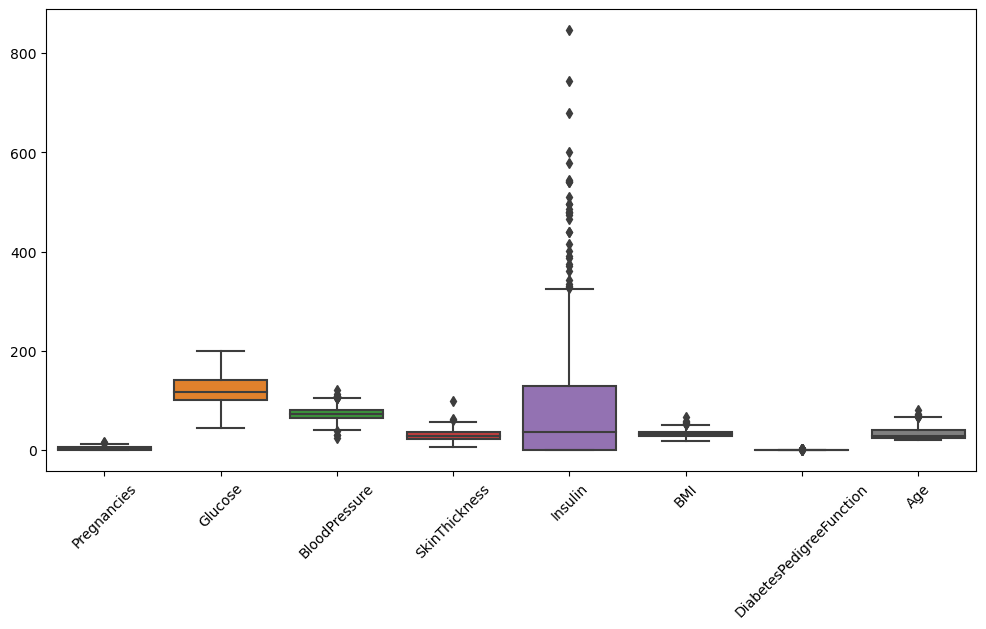

In [4]:
# Check for outliers with appropriate plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop('Outcome', axis=1))
plt.xticks(rotation=45)
plt.show()


In [5]:
# Remove the outliers from the dataset
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

outlier_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df = remove_outliers(df, outlier_columns)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1.0
14,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51.0,1.0
...,...,...,...,...,...,...,...,...,...
789,2.0,101.0,58.0,35.0,90.0,21.8,0.155,22.0,0.0
790,1.0,120.0,80.0,48.0,200.0,38.9,1.162,41.0,0.0
796,9.0,145.0,80.0,46.0,130.0,37.9,0.637,40.0,1.0
797,6.0,115.0,60.0,39.0,0.0,33.7,0.245,40.0,1.0


In [6]:
# Do the missing value treatment
df = df.dropna()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1.0
14,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51.0,1.0
...,...,...,...,...,...,...,...,...,...
789,2.0,101.0,58.0,35.0,90.0,21.8,0.155,22.0,0.0
790,1.0,120.0,80.0,48.0,200.0,38.9,1.162,41.0,0.0
796,9.0,145.0,80.0,46.0,130.0,37.9,0.637,40.0,1.0
797,6.0,115.0,60.0,39.0,0.0,33.7,0.245,40.0,1.0


In [7]:
# Perform feature scaling for the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Outcome', axis=1))
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled['Outcome'] = df['Outcome']

In [8]:
df_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.831148,1.016444,0.083582,0.653681,-1.118548,0.192475,0.645612,2.136226,1.0
1,-0.759850,-1.135051,-0.462060,0.040696,-1.118548,-0.914976,-0.412449,0.063596,0.0
2,-0.759850,-0.998448,-0.462060,-0.572289,-0.067375,-0.677665,-1.117823,-1.027262,NaN
3,-0.123451,-1.374106,-1.917107,0.347189,-0.134471,-0.218864,-0.807305,-0.481833,0.0
4,0.512948,1.631157,0.083582,-0.980946,0.838424,-1.041542,0.492270,2.245312,NaN
...,...,...,...,...,...,...,...,...,...
477,-0.441650,-0.588639,-1.189583,0.653681,-0.112105,-1.674371,-1.163826,-0.918177,0.0
478,-0.759850,0.060224,0.811105,1.981816,1.117991,1.030973,2.696563,1.154454,0.0
479,1.785746,0.913992,0.811105,1.777488,0.335202,0.872766,0.683947,1.045368,NaN
480,0.831148,-0.110529,-1.007703,1.062338,-1.118548,0.208295,-0.818806,1.045368,1.0


In [9]:

# Find & List the most important 5 features to determine the Outcome variable
X = df_scaled.drop('Outcome', axis=1)
y = df_scaled['Outcome']
X
y
correlation = df_scaled.corr()['Outcome'].abs().sort_values(ascending=False)
selected_features = correlation[1:6].index.tolist()
selected_features

['DiabetesPedigreeFunction', 'BMI', 'BloodPressure', 'Age', 'Glucose']

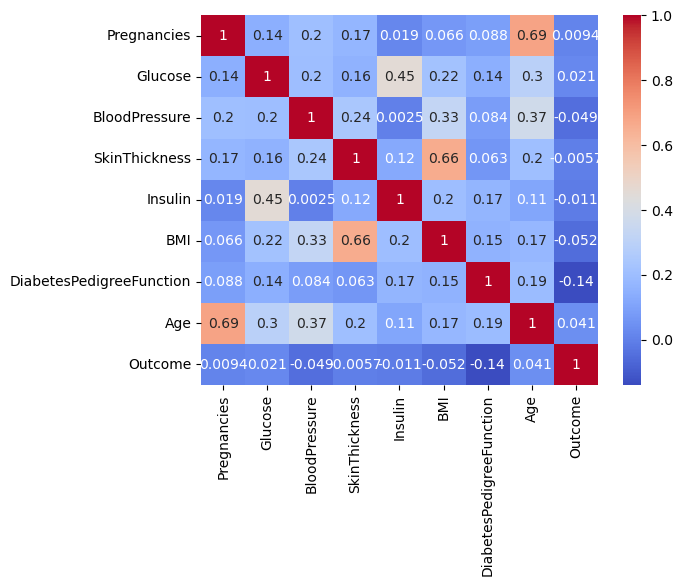

In [10]:
# Check with heatmap or correlation matrix to confirm the 5 selected features
selected_data = df[selected_features + ['Outcome']]
correlation_matrix = df_scaled.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [11]:
# Perform PCA and generate two components for the 5 features selected
pca = PCA(n_components=2)
pca_components = pca.fit_transform(selected_data.drop('Outcome', axis=1))
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Outcome'] = selected_data['Outcome']

In [12]:
# Split the data into train and test (75:25) keeping the target variable as Outcome
X_train, X_test, y_train, y_test = train_test_split(selected_data.drop('Outcome', axis=1), selected_data['Outcome'],test_size=0.25, random_state=42)

In [13]:
# Print the selected features and the first few rows of the PCA-transformed data
print("Selected Features: ", selected_features)
print("\nPCA Components:")
print(pca_df.head())

Selected Features:  ['DiabetesPedigreeFunction', 'BMI', 'BloodPressure', 'Age', 'Glucose']

PCA Components:
         PC1        PC2  Outcome
0  31.627670   5.815148      1.0
1 -33.574529  -0.628216      0.0
2 -30.586201  -5.434450      NaN
3 -42.260814 -14.827465      0.0
4  49.126760   2.284442      NaN
